# Storytelling with Open Data and Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

print(sys.version)
%matplotlib inline

3.6.2 |Anaconda custom (64-bit)| (default, Jul 20 2017, 13:51:32) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


# Nova Scotia

## Consumer Protection Complaints Types and Frequency

### Plot for 2015 data

About this dataset: https://data.novascotia.ca/Business-and-Industry/Consumer-Protection-Complaints-Types-and-Frequency/myt7-2fzu

Time period: 2015-01-01/2016-12-31

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/tarjin/NS_Open_Data/master/Consumer_Protection_Complaints_Types_and_Frequency.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
Complaint Type          50 non-null object
Sub Category            50 non-null object
Year                    50 non-null object
Number of Complaints    50 non-null int64
dtypes: int64(1), object(3)
memory usage: 1.6+ KB


In [4]:
df.head()

,Complaint Type,Sub Category,Year,Number of Complaints
0,Borrowing Money,Complaint,01/01/2015 12:00:00 AM,10
1,Cemetery and Funeral Services,Complaint,01/01/2015 12:00:00 AM,1
2,Collection Practice,Complaint,01/01/2015 12:00:00 AM,73
3,Consumer Credit Reporting,Complaint,01/01/2015 12:00:00 AM,11
4,Consumer Purchase,Complaint,01/01/2015 12:00:00 AM,72


In [5]:
df['Complaint Type'] = df['Complaint Type'].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
Complaint Type          50 non-null category
Sub Category            50 non-null object
Year                    50 non-null object
Number of Complaints    50 non-null int64
dtypes: category(1), int64(1), object(2)
memory usage: 2.1+ KB


In [7]:
df

,Complaint Type,Sub Category,Year,Number of Complaints
0,Borrowing Money,Complaint,01/01/2015 12:00:00 AM,10
1,Cemetery and Funeral Services,Complaint,01/01/2015 12:00:00 AM,1
2,Collection Practice,Complaint,01/01/2015 12:00:00 AM,73
3,Consumer Credit Reporting,Complaint,01/01/2015 12:00:00 AM,11
4,Consumer Purchase,Complaint,01/01/2015 12:00:00 AM,72
5,Direct Selling,Complaint,01/01/2015 12:00:00 AM,3
6,Other,Complaint,01/01/2015 12:00:00 AM,36
7,Automotive Sales/Services,Industry,01/01/2015 12:00:00 AM,17
8,Distance Sales,Industry,01/01/2015 12:00:00 AM,7
9,Financial Institution,Industry,01/01/2015 12:00:00 AM,9


In [8]:
df['All Complaint Types'] = df['Complaint Type'].astype(str) + ' (' + df['Sub Category'] + ')'

In [9]:
df = df.sort_values('Number of Complaints', ascending=False)

In [10]:
df_2015 = df

In [11]:
df_2015.drop(df[df.Year == '01/01/2016 12:00:00 AM'].index, inplace=True)

In [12]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 23 to 1
Data columns (total 5 columns):
Complaint Type          25 non-null category
Sub Category            25 non-null object
Year                    25 non-null object
Number of Complaints    25 non-null int64
All Complaint Types     25 non-null object
dtypes: category(1), int64(1), object(3)
memory usage: 1.8+ KB


In [13]:
df_2015

,Complaint Type,Sub Category,Year,Number of Complaints,All Complaint Types
23,Other,Concern Complaint,01/01/2015 12:00:00 AM,150,Other (Concern Complaint)
14,Other,Industry,01/01/2015 12:00:00 AM,114,Other (Industry)
2,Collection Practice,Complaint,01/01/2015 12:00:00 AM,73,Collection Practice (Complaint)
4,Consumer Purchase,Complaint,01/01/2015 12:00:00 AM,72,Consumer Purchase (Complaint)
6,Other,Complaint,01/01/2015 12:00:00 AM,36,Other (Complaint)
15,Retail Business,Industry,01/01/2015 12:00:00 AM,27,Retail Business (Industry)
7,Automotive Sales/Services,Industry,01/01/2015 12:00:00 AM,17,Automotive Sales/Services (Industry)
10,Home Repair or Renovation,Industry,01/01/2015 12:00:00 AM,17,Home Repair or Renovation (Industry)
18,Billing/Pricing,Concern Complaint,01/01/2015 12:00:00 AM,14,Billing/Pricing (Concern Complaint)
20,Failure to Fulfill Contract,Concern Complaint,01/01/2015 12:00:00 AM,12,Failure to Fulfill Contract (Concern Complaint)


In [14]:
plt.figure()

In [15]:
plt.rcParams['figure.figsize']=(10,10)

Text(0.5,1,'Consumer Protection Complaints Types and Frequency in 2015, Nova Scotia')

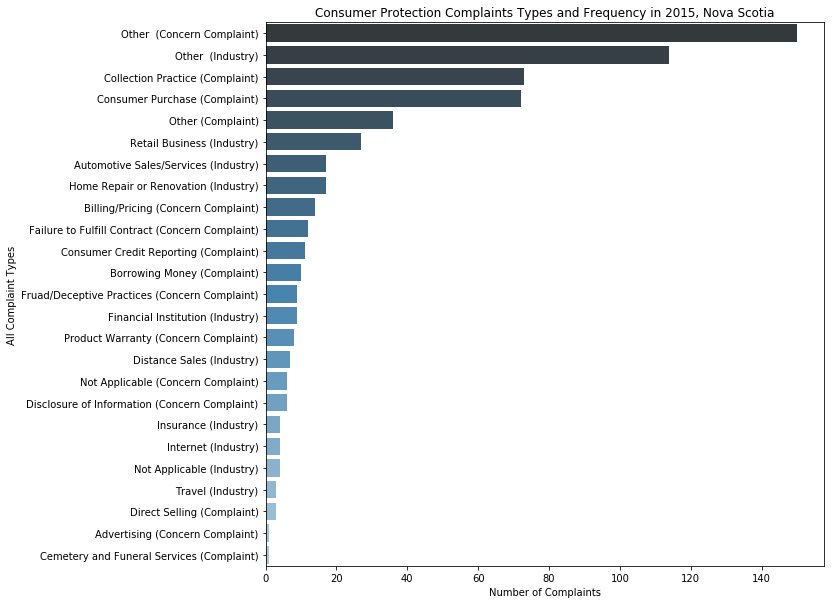

In [16]:
ax = sns.barplot(x="Number of Complaints", y="All Complaint Types", palette="Blues_d", ci=None, data=df_2015)
ax.set_title('Consumer Protection Complaints Types and Frequency in 2015, Nova Scotia')

In [17]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 23 to 1
Data columns (total 5 columns):
Complaint Type          25 non-null category
Sub Category            25 non-null object
Year                    25 non-null object
Number of Complaints    25 non-null int64
All Complaint Types     25 non-null object
dtypes: category(1), int64(1), object(3)
memory usage: 2.4+ KB


In [18]:
plt.show()

### Plot for 2016 data

In [19]:
df = pd.read_csv("https://raw.githubusercontent.com/tarjin/NS_Open_Data/master/Consumer_Protection_Complaints_Types_and_Frequency.csv")

In [20]:
df['All Complaint Types'] = df['Complaint Type'].astype(str) + ' (' + df['Sub Category'] + ')'

In [21]:
df = df.sort_values('Number of Complaints', ascending=False)

In [22]:
df_2016 = df

In [23]:
df_2016.drop(df[df.Year == '01/01/2015 12:00:00 AM'].index, inplace=True)

In [24]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 48 to 42
Data columns (total 5 columns):
Complaint Type          25 non-null object
Sub Category            25 non-null object
Year                    25 non-null object
Number of Complaints    25 non-null int64
All Complaint Types     25 non-null object
dtypes: int64(1), object(4)
memory usage: 1.2+ KB


In [25]:
plt.figure()

In [26]:
plt.rcParams['figure.figsize']=(10,10)

Text(0.5,1,'Consumer Protection Complaints Types and Frequency in 2016, Nova Scotia')

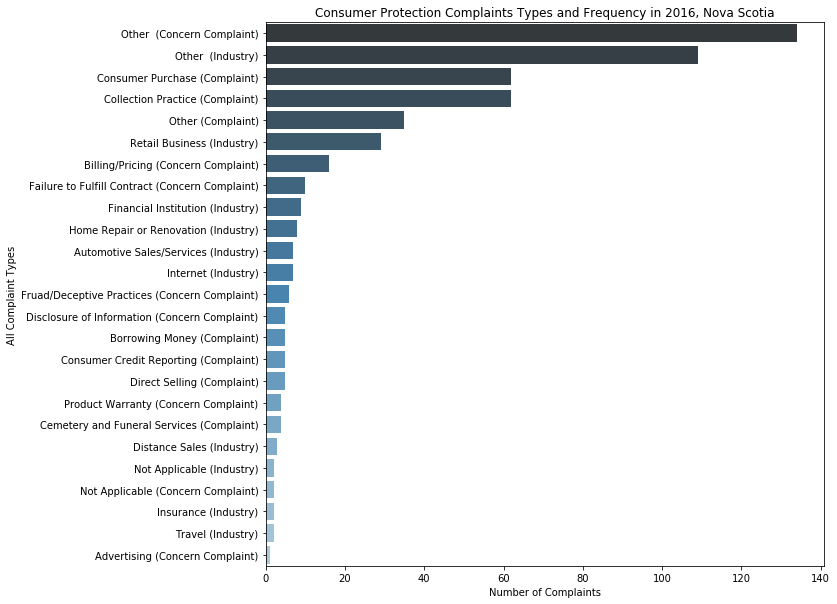

In [27]:
ax = sns.barplot(x="Number of Complaints", y="All Complaint Types", palette="Blues_d", ci=None, data=df_2016)
ax.set_title('Consumer Protection Complaints Types and Frequency in 2016, Nova Scotia')

In [28]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 48 to 42
Data columns (total 5 columns):
Complaint Type          25 non-null object
Sub Category            25 non-null object
Year                    25 non-null object
Number of Complaints    25 non-null int64
All Complaint Types     25 non-null object
dtypes: int64(1), object(4)
memory usage: 1.8+ KB


### Plot of 2015 and 2016 on the same chart -- tbd

# Ontario

In [29]:
plt.rcParams['figure.figsize']=(10,10)